In [1]:
import os
import json
import random
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [24]:
jsonPath=r"..\Object Recognition Dataset\instances_val2017.json\instances_val2017.json"
imagesPath=r"..\Object Recognition Dataset\val2017"


In [25]:

jfile=open(jsonPath,"r")
jfile=json.load(jfile)
jfile.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [62]:
print(jfile["images"][0])

{'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}


In [63]:
jfile["annotations"][0].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [64]:
jfile["categories"][0]

{'supercategory': 'person', 'id': 1, 'name': 'person'}

In [65]:
categos={i["id"]:i["name"] for i  in jfile["categories"]}
categos

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [66]:
from collections import defaultdict
annos=defaultdict(list)
for val in jfile["annotations"]:
    annos[val["image_id"]].append({"category":val["category_id"],"bbox":val["bbox"]})

In [67]:
for id in annos:
    for cata in annos[id]:
        cata["category"]=categos[cata["category"]]
annos

defaultdict(list,
            {289343: [{'category': 'dog',
               'bbox': [473.07, 395.93, 38.65, 28.67]},
              {'category': 'person', 'bbox': [204.01, 235.08, 60.84, 177.36]},
              {'category': 'bench', 'bbox': [0.43, 499.79, 339.79, 106.45]},
              {'category': 'bicycle', 'bbox': [204.42, 304.1, 52.51, 152.76]}],
             61471: [{'category': 'dog',
               'bbox': [272.1, 200.23, 151.97, 279.77]},
              {'category': 'bottle', 'bbox': [181.23, 86.28, 27.44, 73.53]},
              {'category': 'toilet', 'bbox': [174.74, 0.0, 261.04, 220.79]}],
             472375: [{'category': 'dog',
               'bbox': [124.71, 196.18, 372.85, 356.81]},
              {'category': 'motorcycle',
               'bbox': [59.4, 50.77, 501.48, 390.96]},
              {'category': 'cup', 'bbox': [288.83, 70.02, 27.52, 26.74]},
              {'category': 'cup', 'bbox': [312.59, 76.52, 27.44, 23.42]}],
             520301: [{'category': 'dog',
        

In [68]:
fjson={}
for val in jfile["images"]:
    fjson[val["id"]]={"file_name":val["file_name"],"shape":(val["height"],val["width"]),"bboxes":annos[val["id"]]}


In [70]:
# os.makedirs("../new_dataset")
fjson

{397133: {'file_name': '000000397133.jpg',
  'shape': (427, 640),
  'bboxes': [{'category': 'bottle', 'bbox': [217.62, 240.54, 38.99, 57.75]},
   {'category': 'dining table', 'bbox': [1.0, 240.24, 346.63, 186.76]},
   {'category': 'person', 'bbox': [388.66, 69.92, 109.41, 277.62]},
   {'category': 'knife', 'bbox': [135.57, 249.43, 22.32, 28.79]},
   {'category': 'bowl', 'bbox': [31.28, 344.0, 68.12, 40.83]},
   {'category': 'bowl', 'bbox': [59.63, 287.36, 76.07, 41.3]},
   {'category': 'oven', 'bbox': [1.36, 164.33, 192.56, 98.37]},
   {'category': 'person', 'bbox': [0.0, 262.81, 62.16, 36.77]},
   {'category': 'cup', 'bbox': [119.4, 272.51, 24.82, 34.25]},
   {'category': 'cup', 'bbox': [141.47, 267.91, 32.19, 35.86]},
   {'category': 'bowl', 'bbox': [155.97, 168.95, 26.03, 17.13]},
   {'category': 'bowl', 'bbox': [157.2, 114.15, 17.86, 15.82]},
   {'category': 'broccoli', 'bbox': [98.75, 304.78, 10.78, 5.57]},
   {'category': 'spoon', 'bbox': [166.03, 256.36, 8.82, 18.58]},
   {'cate

In [71]:
with open("../new_dataset/metadata.json","w") as f:
    json.dump(fjson,f)

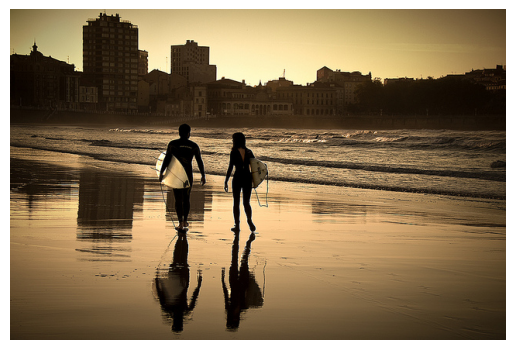

{'file_name': '000000364557.jpg',
 'shape': [427, 640],
 'bboxes': [{'category': 'person', 'bbox': [193.26, 148.11, 59.03, 137.3]},
  {'category': 'surfboard', 'bbox': [181.42, 181.16, 52.08, 50.98]},
  {'category': 'surfboard', 'bbox': [309.45, 192.1, 26.03, 40.77]},
  {'category': 'person', 'bbox': [276.65, 158.15, 39.68, 130.58]}]}

In [26]:

njfile=json.load(open("../new_dataset/metadata.json","r"))
imgslist=[njfile[id] for id in njfile]
imgdata=imgslist[random.randint(0,5000) if ((k:=input("select on image"))=="") else int(k)]

image=Image.open(os.path.join(imagesPath,imgdata["file_name"]))
plt.imshow(image)
plt.axis("off")
plt.show()
imgdata

In [27]:
def MakeBoxes(imagePath,imgdata):
    
    img=cv2.imread(os.path.join(imagePath,imgdata["file_name"]))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    for obj in imgdata["bboxes"]:
        b=[int(i) for i in obj["bbox"]]
        cv2.putText(img,obj["category"],(b[0],b[1]-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),1,cv2.LINE_AA)
        cv2.rectangle(img,(b[0],b[1]),(b[0]+b[2],b[1]+b[3]),(255,0,0),2)
    plt.imshow(Image.fromarray(img))
    plt.axis("off")
    plt.show()

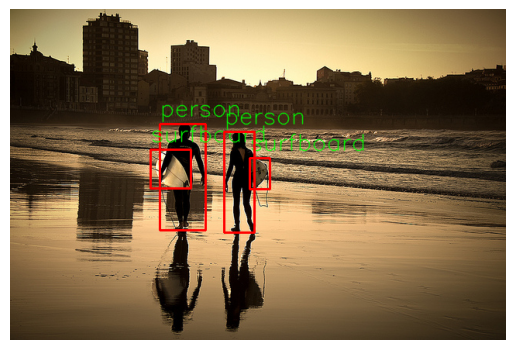

In [28]:
MakeBoxes(imagesPath,imgdata)

(427, 640, 3)


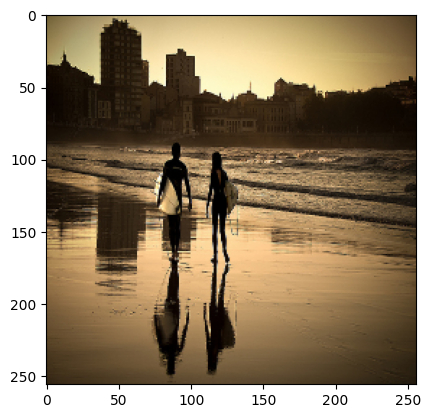

0.5995316159250585 0.4
[77, 88, 23, 82]


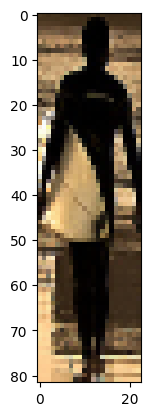

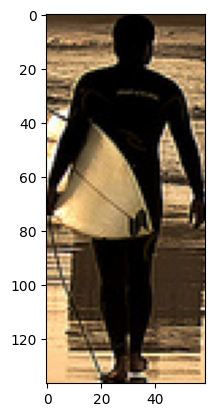

In [33]:
img=cv2.imread(os.path.join(imagesPath,imgdata["file_name"]))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)
img2=cv2.resize(img,(256,256))
plt.imshow(Image.fromarray(img2))
plt.show()
hs=256/427
ws=256/640
print(hs,ws)
b=[i for i in imgdata["bboxes"][0]["bbox"]]
b2=[int(i) for i in imgdata["bboxes"][0]["bbox"]]
img4=img[b2[1]:b2[1]+b2[3],b2[0]:b2[0]+b2[2]]
b[0]=int(b[0]*ws)
b[1]=int(b[1]*hs)
b[2]=int(b[2]*ws)
b[3]=int(b[3]*hs)
print(b)
img3=img2[b[1]:b[1]+b[3],b[0]:b[0]+b[2]]
# img5=img2[int(b[1]*hs):int((b[1]+b[3])*hs),int(b[0]*ws):int((b[0]+b[2])*ws)]
# plt.imshow(Image.fromarray(img5))
# plt.show()
plt.imshow(Image.fromarray(img3))
plt.show()
plt.imshow(Image.fromarray(img4))

In [38]:
os.makedirs("../new_dataset/resized_images")

In [76]:
def MakeAndSave_resizedImages(oldPath,newpath,imagesData):
    
    for id in imagesData:
        imgdata=imagesData[id]
        img=cv2.imread(os.path.join(oldPath,imgdata["file_name"]))
        cv2.imwrite(os.path.join(newpath,imgdata["file_name"]),cv2.resize(img,(256,256)))
        

In [2]:
new_imagesPath=r"../new_dataset/resized_images"
# MakeAndSave_resizedImages(imagesPath,new_imagesPath,njfile)

In [126]:
def Make_resized_image_metadata(metapath,imagesdata):
    new_md={}
    i=0
    for id in imagesdata:
        imgdata=imagesdata[id]
        h,w=imgdata["shape"]
        heightScale=256/h
        widthScale=256/w
        
        new_md[id]={"file_name":imgdata["file_name"],"bboxes":[]}
        for bboxes in imgdata["bboxes"]:
            new_md[id]["bboxes"].append({"category":bboxes["category"],"bbox":[bboxes["bbox"][0]*widthScale,
                                                                               bboxes["bbox"][1]*heightScale,
                                                                               bboxes["bbox"][2]*widthScale,
                                                                               bboxes["bbox"][3]*heightScale]})         
            
            
    with open(os.path.join(metapath,"resized_metadata.json"),"w") as newfile:
        json.dump(new_md,newfile)

In [127]:
metapath=r"../new_dataset"
Make_resized_image_metadata(metapath,njfile)

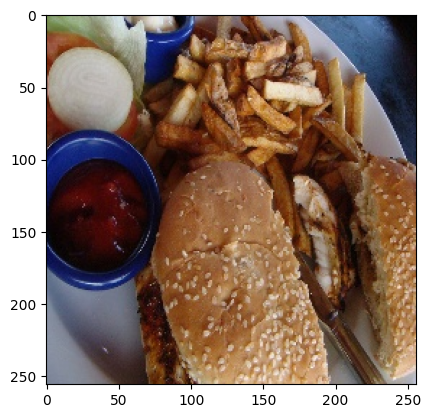

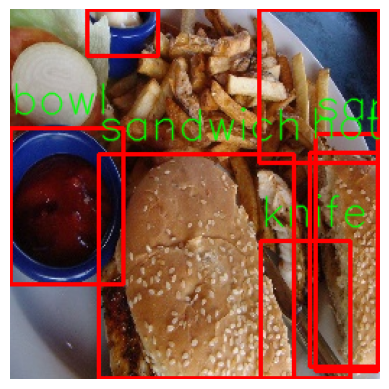

{'file_name': '000000006818.jpg',
 'bboxes': [{'category': 'toilet',
   'bbox': [112.0944262295082,
    188.732,
    60.35484777517564,
    22.436000000000003]}]}

In [29]:
rnjfile=json.load(open("../new_dataset/resized_metadata.json","r"))
rimglist=[rnjfile[id] for id in rnjfile]
plt.imshow(Image.open(os.path.join(new_imagesPath,rimglist[100]["file_name"])))
plt.show()


MakeBoxes(new_imagesPath,rimglist[100])
rimglist[66]

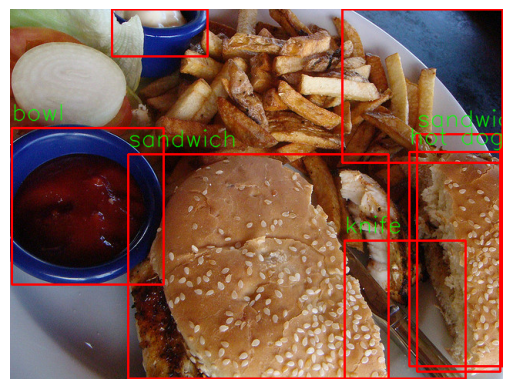

In [31]:
MakeBoxes(imagesPath,imgslist[100])

In [9]:
rnjfile=json.load(open("../new_dataset/resized_metadata.json","r"))
rimglist=[rnjfile[id] for id in rnjfile]
resizedimgdata=rimglist[random.randint(0,5000) if ((k:=input("select on image"))=="") else int(k)]
rimg=cv2.imread(os.path.join(new_imagesPath,resizedimgdata["file_name"]))
rimg=cv2.cvtColor(rimg,cv2.COLOR_BGR2RGB)


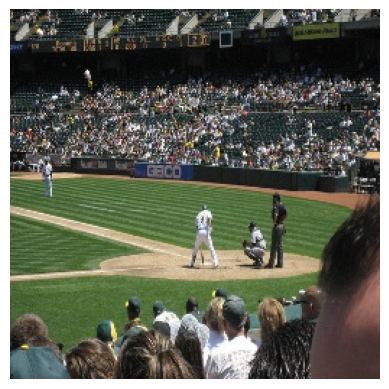

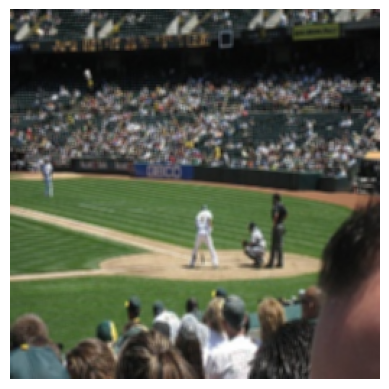

In [13]:
plt.imshow(rimg)
plt.axis("off")
plt.show()
plt.imshow(cv2.blur(rimg,(3,3)))
plt.axis("off")
plt.show()

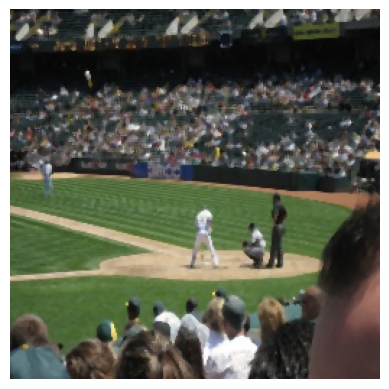

(-0.5, 255.5, 255.5, -0.5)

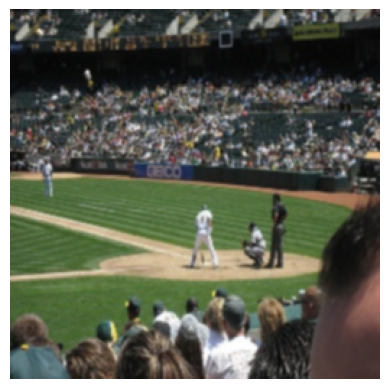

In [17]:

plt.imshow(cv2.medianBlur(rimg,3))
plt.axis("off")
plt.show()
rimgb=cv2.GaussianBlur(rimg,(3,3),0)
plt.imshow(rimgb)
plt.axis("off")

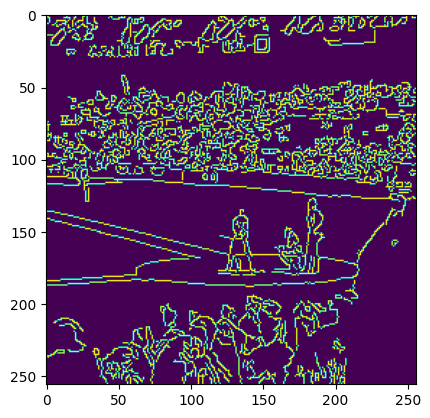

In [22]:
gray=cv2.cvtColor(rimgb,cv2.COLOR_RGB2GRAY)
plt.imshow(cv2.Canny(gray,100,200))

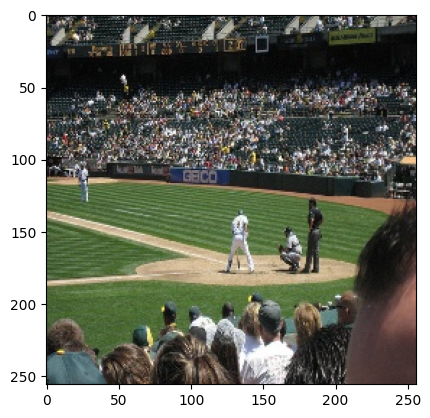

In [47]:
plt.imshow(rimg)

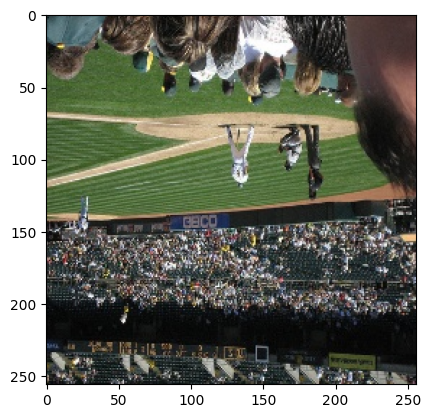

In [48]:

plt.imshow(cv2.flip(rimg,0))

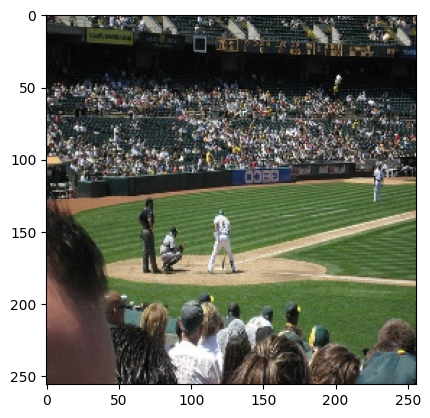

In [49]:
plt.imshow(cv2.flip(rimg,1))

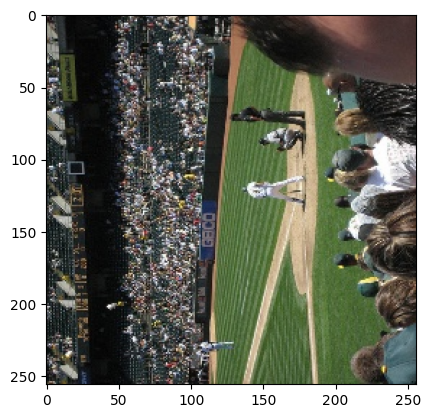

In [54]:
plt.imshow(cv2.rotate(rimg,cv2.ROTATE_90_COUNTERCLOCKWISE))

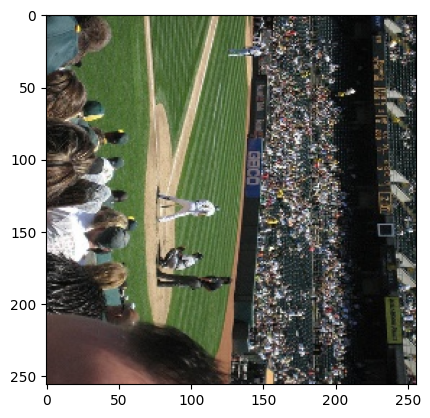

In [55]:
plt.imshow(cv2.rotate(rimg,cv2.ROTATE_90_CLOCKWISE))


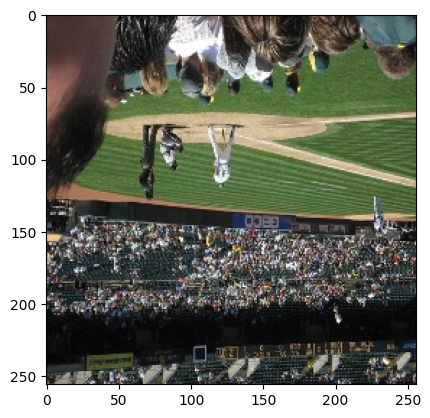

In [56]:
plt.imshow(cv2.rotate(rimg,cv2.ROTATE_180))